# Vrtenje in vztrajnostni moment telesa

**Datum meritev**: 27. 10. 2017

**Merila**:
- Žiga Patačko Koderman
- Yap Ploj

Meritve opravljene po navodilih v [navodila.pdf](vrtenje_in_vztrajnostni_moment_telesa.pdf).

Vsebine map:
- `brez_dodatnih_koles` - samo glavno kolo, ki ga pospešeno vrti utež, katere teža je zapisana v imenu posamezne datoteke,
- `gibljivo_vpeta_dodatna_kolesa` - gibljivo vpeta_dodatna_kolesa, glavno kolo pa vrti utež, katere teža je zapisana v imenu posamezne datoteke,
- `togo_vpeta_dodatna_kolesa` - togo vpeta_dodatna_kolesa, glavno kolo pa vrti utež, katere teža je zapisana v imenu posamezne datoteke,
- `upor_lezaja` - kolo zavrteno z roko, da določimo približen upor ležaja,

Originalne meritve so bile zapisane narobe: Logger Pro je izvoz v csv (Comma Separated Values) naredil tako, da je vejico uporabil tako za ločilo med podatki kot za decimalno ločilo. Originalne datoteke so bile zato popravljene z programom [`convert.py`](convert.py), prepoznamo pa jih po predponi `'converted_'`.

## Obdelava podatkov

Vključitev vseh knjižnic:

In [2]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

Branje podatkov:

In [27]:
rj = (0.0201, 0.005)
utezi = {
    '50g': 0.05,
    '100g': 0.1
}
g = 9.81
alpha = {}
J = {}
r_dodatnega_kolesa = (0.047, 0.002)
m_dodatnega_kolesa = (0.515, 0.002)
razdalja_osi = (0.0735, 0.0015)

upori = [
    pnd.read_csv('data/upor_lezaja/converted_0.csv', usecols=[0, 2], dtype=float),
    pnd.read_csv('data/upor_lezaja/converted_1.csv', usecols=[0, 2], dtype=float),
    pnd.read_csv('data/upor_lezaja/converted_2.csv', usecols=[0, 2], dtype=float)
]
brez_dodatnih_koles = {
    '50g': [
        pnd.read_csv('data/brez_dodatnih_koles/converted_50g_0.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/brez_dodatnih_koles/converted_50g_1.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/brez_dodatnih_koles/converted_50g_2.csv', usecols=[0, 2], dtype=float)
    ],
    '100g': [
        pnd.read_csv('data/brez_dodatnih_koles/converted_100g_0.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/brez_dodatnih_koles/converted_100g_1.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/brez_dodatnih_koles/converted_100g_2.csv', usecols=[0, 2], dtype=float)
    ]
}
gibljivo = {
    '50g': [
        pnd.read_csv('data/gibljivo_vpeta_dodatna_kolesa/converted_50g_0.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/gibljivo_vpeta_dodatna_kolesa/converted_50g_1.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/gibljivo_vpeta_dodatna_kolesa/converted_50g_2.csv', usecols=[0, 2], dtype=float)
    ],
    '100g': [
        pnd.read_csv('data/gibljivo_vpeta_dodatna_kolesa/converted_100g_0.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/gibljivo_vpeta_dodatna_kolesa/converted_100g_1.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/gibljivo_vpeta_dodatna_kolesa/converted_100g_2.csv', usecols=[0, 2], dtype=float)
    ]
}
togo = {
    '50g': [
        pnd.read_csv('data/togo_vpeta_dodatna_kolesa/converted_50g_0.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/togo_vpeta_dodatna_kolesa/converted_50g_1.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/togo_vpeta_dodatna_kolesa/converted_50g_2.csv', usecols=[0, 2], dtype=float)
    ],
    '100g': [
        pnd.read_csv('data/togo_vpeta_dodatna_kolesa/converted_100g_0.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/togo_vpeta_dodatna_kolesa/converted_100g_1.csv', usecols=[0, 2], dtype=float),
        pnd.read_csv('data/togo_vpeta_dodatna_kolesa/converted_100g_2.csv', usecols=[0, 2], dtype=float)
    ]
}


Funkcija za izracun povprecnega kotnega pospeska iz treh meritev:

In [28]:
def alpha_from_graphs(graphs, correction):
    result = 0
    r2 = []
    for i in range(3):
        graph = graphs[i]
        x = np.array(graph['time'])
        y = np.array(graph['omega'])
        A = np.vstack([x, np.ones(len(x))]).T
        #line, cov = np.polyfit(graph['time'], graph['omega'], 1, cov=True) # fit line
        line, resid = np.linalg.lstsq(A, y)[:2] # fit line
        result += line[0] + correction # add new line to avg
        r2.append(g)
            
    result /= 3# calculate average
    return result, max(r2)[0]

Izracun vztrajnostnega momenta praznega kolesa:

In [29]:
alpha['upor'] = alpha_from_graphs(upori, 0)
print('upor lezaja:', alpha['upor'], '1/s^2')

alpha['brez_dodatnih_koles_50g'] = alpha_from_graphs(brez_dodatnih_koles['50g'], -alpha['upor'][0])
alpha['brez_dodatnih_koles_100g'] = alpha_from_graphs(brez_dodatnih_koles['100g'], -alpha['upor'][0])

alpha['brez_dodatnih_koles_50g'] = (alpha['brez_dodatnih_koles_50g'][0] - alpha['upor'][0], alpha['brez_dodatnih_koles_50g'][1])

print('alpha za 50g in 100g', alpha['brez_dodatnih_koles_50g'][0], alpha['brez_dodatnih_koles_100g'][0])

J['brez_dodatnih_koles_50g'] = ((utezi['50g']*(rj[0]*g-rj[0]**2*alpha['brez_dodatnih_koles_50g'][0]))/alpha['brez_dodatnih_koles_50g'][0],
                                2*rj[1]+2*alpha['brez_dodatnih_koles_50g'][1])
J['brez_dodatnih_koles_100g'] = ((utezi['100g']*(rj[0]*g-rj[0]**2*alpha['brez_dodatnih_koles_100g'][0]))/alpha['brez_dodatnih_koles_100g'][0],
                                2*rj[1]+2*alpha['brez_dodatnih_koles_100g'][1])
J['brez_dodatnih_koles'] = ((J['brez_dodatnih_koles_100g'][0] + J['brez_dodatnih_koles_50g'][0]) / 2,
                           max([J['brez_dodatnih_koles_100g'][1], J['brez_dodatnih_koles_50g'][1]]))

print('J praznega kolesa za 50g in 100g', J['brez_dodatnih_koles_50g'][0], J['brez_dodatnih_koles_100g'][0])
print('J kolesa:', J['brez_dodatnih_koles'][0], '* (1 +-', J['brez_dodatnih_koles'][1] ,') kgm^2')

upor lezaja: (-0.10321217797878286, 0.005792556512800159) 1/s^2
alpha za 50g in 100g 0.607361946747 0.928180448889
J praznega kolesa za 50g in 100g 0.0162123772122 0.0212034207413
J kolesa: 0.0187078989768 * (1 +- 0.011403559355 ) kgm^2


In podatki za togo vpeta manjsa kolesa:

In [30]:
alpha['togo_50g'] = alpha_from_graphs(togo['50g'], -alpha['upor'][0])
alpha['togo_100g'] = alpha_from_graphs(togo['100g'], -alpha['upor'][0])

print('alpha za 50g in 100g', alpha['togo_50g'][0], alpha['togo_100g'][0])

J['togo_50g'] = ((utezi['50g']*(rj[0]*g-rj[0]**2*alpha['togo_50g'][0]))/alpha['togo_50g'][0],
                                2*rj[1]+2*alpha['togo_50g'][1])
J['togo_100g'] = ((utezi['100g']*(rj[0]*g-rj[0]**2*alpha['togo_100g'][0]))/alpha['togo_100g'][0],
                                2*rj[1]+2*alpha['togo_100g'][1])
J['togo'] = ((J['togo_100g'][0] + J['togo_50g'][0]) / 2,
                           max([J['togo_100g'][1], J['togo_50g'][1]]))

print('J togo za 50g in 100g', J['togo_50g'][0], J['togo_100g'][0])
print('J togo:', J['togo'][0], '* (1 +-', J['togo'][1] ,') kgm^2')

alpha za 50g in 100g 0.346798920606 0.592579745363
J togo za 50g in 100g 0.0284085212007 0.0332346141423
J togo: 0.0308215676715 * (1 +- 0.0212698524647 ) kgm^2


Izracun podatkov za togo vpeta kolesa:

In [31]:
J['izracunan_togo'] = (J['brez_dodatnih_koles'][0] + 2*(0.5*m_dodatnega_kolesa[0]*r_dodatnega_kolesa[0]**2 + m_dodatnega_kolesa[0]*razdalja_osi[0]**2),
                       J['brez_dodatnih_koles'][1] + m_dodatnega_kolesa[1] + 2*r_dodatnega_kolesa[1])
print('izracunan J za togo vpeta kolesa', J['izracunan_togo'][0], '* (1 +-', J['izracunan_togo'][1] ,') kgm^2')

izracunan J za togo vpeta kolesa 0.0254098514768 * (1 +- 0.017403559355 ) kgm^2


Gibljivo vpeta manjsa kolesa:

In [32]:
alpha['gibljivo_50g'] = alpha_from_graphs(gibljivo['50g'], -alpha['upor'][0])
alpha['gibljivo_100g'] = alpha_from_graphs(gibljivo['100g'], -alpha['upor'][0])

print('alpha za 50g in 100g', alpha['gibljivo_50g'][0], alpha['gibljivo_100g'][0])

J['gibljivo_50g'] = ((utezi['50g']*(rj[0]*g-rj[0]**2*alpha['gibljivo_50g'][0]))/alpha['gibljivo_50g'][0],
                                2*rj[1]+2*alpha['gibljivo_50g'][1])
J['gibljivo_100g'] = ((utezi['100g']*(rj[0]*g-rj[0]**2*alpha['gibljivo_100g'][0]))/alpha['gibljivo_100g'][0],
                                2*rj[1]+2*alpha['gibljivo_100g'][1])
J['gibljivo'] = ((J['gibljivo_100g'][0] + J['gibljivo_50g'][0]) / 2,
                           max([J['gibljivo_100g'][1], J['gibljivo_50g'][1]]))

print('J gibljivo za 50g in 100g', J['gibljivo_50g'][0], J['gibljivo_100g'][0])
print('J gibljivo:', J['gibljivo'][0], '* (1 +-', J['gibljivo'][1] ,') kgm^2')

alpha za 50g in 100g 0.349076461743 0.600480213063
J gibljivo za 50g in 100g 0.0282230386768 0.0327968175645
J gibljivo: 0.0305099281206 * (1 +- 0.0127681491178 ) kgm^2


Izracun za gibljivo vpeta:

In [33]:
J['izracunan_gibljivo'] = (J['brez_dodatnih_koles'][0] + 2*m_dodatnega_kolesa[0]*razdalja_osi[0]**2,
                       J['brez_dodatnih_koles'][1] + m_dodatnega_kolesa[1] + razdalja_osi[1]*2)
print('izracunan J za gibljivo vpeta kolesa', J['izracunan_gibljivo'][0], '* (1 +-', J['izracunan_gibljivo'][1] ,') kgm^2')

izracunan J za gibljivo vpeta kolesa 0.0242722164768 * (1 +- 0.016403559355 ) kgm^2


Veljavnost izreka o energiji:
Podatki so vzeti iz meritev za togo vpeta dodatna kolesa pri utezi z maso 50g, po tem ko pade utez za 0.2367 m.

$$
m_u = 0.050\ kg \\
h = 0.2367 *\ (1 \pm 0.002) \ m \\
\omega = 2.450 *\ (1 \pm 0.05)\ s^{-1}\\
v_u = 0.049 *\ (1 \pm 0.05)\ \frac{m}{s}\\
J = 0.031\ kgm^2 
$$

Izrek o energiji:
$$
m_ugh = \frac{J \omega}{2} + \frac{m_u v_u^2}{2}
$$

$$
m_ugh =  0.116 * (1\pm0.02)\ J
$$

$$
\frac{J \omega}{2} + \frac{m_u v_u^2}{2} = 0.093 * (1\pm0.2)\ J
$$

### Izpis rezultatov

Upor lezaja: $$ \alpha_{tr} = -0.103*(1 \pm 0.006)\ s^{-2} $$

J praznega kolesa: $$ J_{kolesa} = 0.019 * (1 \pm 0.011 )\ kgm^{2} $$

J kolesa z togo vpetimi manjsimi kolesi: $$ J_{togo} = 0.031 * (1 \pm 0.021 )\ kgm^{2} $$

Izracunan J kolesa z togo vpetimi manjsimi kolesi: $$ J_{togo\ izracunan} = 0.025 * (1 \pm 0.017 )\ kgm^{2} $$

J kolesa z gibljivo vpetimi manjsimi kolesi: $$ J_{gibljivo} = 0.031 * (1 \pm 0.012 )\ kgm^{2} $$

Izracunan J kolesa z togo vpetimi manjsimi kolesi: $$ J_{gibljivo\ izracunan} = 0.024 * (1 \pm 0.016 )\ kgm^{2} $$

## Komentar

Upor lezaja in J praznega kolesa se gibljeta okoli logicnih vrednosti, tocnejsih pricakovanj pa nismo imeli. Ko dodamo manjsi kolesi se J poveca, vendar za skoraj enkrat vec, ko smo pricakovali - ?????. Podobno je pri gibljivem kolesu.

Zelo podobni sta izracunani vrednosti za gibljivo in togo vpeti kolesi, po pricakovanjih pa je pri gibljivo vpetih kolesih J manjsi. Rezultata meritev za ta dva, primera pa sta skoraj enaka, vendar v okviru napak meritve. Tezava je bila tudi velik upor lezajev, na katere smo pritrdili manjsa kolesa.

Pri preverjanju energiskega zakona, naletimo na 20% odstopanje (se vedno v okviru napak), kar je kar precej - pri tem gre najbrs za vpljiv napak iz prejsnjih meritev.

Meritve bi izboljsal z uporabo manjsih utezi in podmazovanjem lezajev (tezave v lezaju in nehomogenosti kolesa so razvidne iz grafa 2). Zelo veliko napako nosi tudi r jermenice, tako da bi ga lahko izmeril se natancneje. Vecjo razliko med togo in gibljivo vpetimi kolesi bi dobil tudi, ce bi celoten sistem povecal - bolje bi bilo ze ce bi imela manjsa kolesa vecjo maso.

Graf 1:


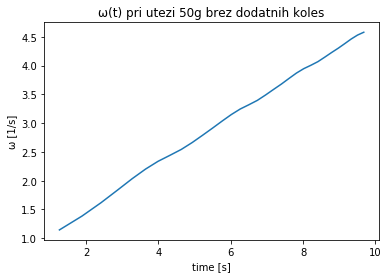

In [34]:
print('Graf 1:')
plt.plot(brez_dodatnih_koles['50g'][0]['time'], brez_dodatnih_koles['50g'][0]['omega'])
plt.ylabel('\u03C9 [1/s]')
plt.xlabel('time [s]')
plt.title('\u03C9(t) pri utezi 50g brez dodatnih koles')

Graf 2:


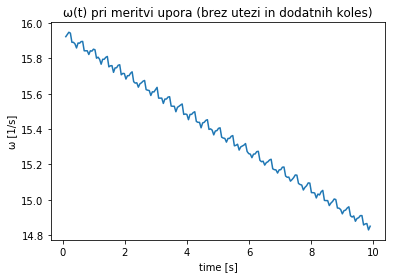

In [35]:
print('Graf 2:')
plt.plot(upori[0]['time'], upori[0]['omega'])
plt.ylabel('\u03C9 [1/s]')
plt.xlabel('time [s]')
plt.title('\u03C9(t) pri meritvi upora (brez utezi in dodatnih koles)')